# 통계 스터디 Quiz

- 일시: 2023.12.01(금)
- 범위: 2장
- 출제: 이우진

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/chapter_2.pkl', 'rb') as file:
    chapter_2 = pickle.load(file)

quiz_1_data = chapter_2['quiz_1']
quiz_2_data = chapter_2['quiz_2']
quiz_3_data = chapter_2['quiz_3']

---

### 1.

상자 그림(box plot)은 자료의 특성을 요약하는 그래프이다. 상자 그림을 그릴 때에는 총 다섯 개의 숫자가 사용되는데, 이는 각각 자료의 최대값, 최소값, 중앙값, 제 1사분위수, 제 3사분위수이다.

In [ ]:
quiz_1_data

array([99, 63, 68, 61, 69, 65, 77, 82, 53, 61, 64, 91, 79, 98, 57, 99, 85,
       69, 74, 59, 90, 61, 78, 53, 65, 51, 94, 87, 80, 51, 75, 56, 87, 95,
       55, 83, 78, 84, 97, 63, 83, 85, 79, 93, 75, 83, 80, 94, 54, 84],
      dtype=int32)

위의 ```quiz_1_data```에 대한 상자 그림을 그리고자 한다. 다음의 물음에 답하시오.

#### (1)

자료에 대한 최대값, 최소값, 중앙값, 제 1사분위수, 제 3사분위수를 구하시오.

In [ ]:
import numpy as np

quiz_1_data = np.array([99, 51, 78.0, 63.0, 85.0])

quiz_1_answers = {
    '최대값': quiz_1_data.max(),
    '최소값': quiz_1_data.min(),
    '중앙값': np.median(quiz_1_data),
    '제 1사분위수': np.quantile(quiz_1_data, 0.25),
    '제 3사분위수': np.quantile(quiz_1_data, 0.75)
}

for key, value in quiz_1_answers.items():
    print(f"{key}: ({value}, 2)")


최대값: (99.0, 2)
최소값: (51.0, 2)
중앙값: (78.0, 2)
제 1사분위수: (63.0, 2)
제 3사분위수: (85.0, 2)


#### (2)

시각화 라이브러리(matplotlib, seaborn 등)를 활용하여 상자 그림을 그리고, (1)에서 구한 값이 맞는지 검증하시오.

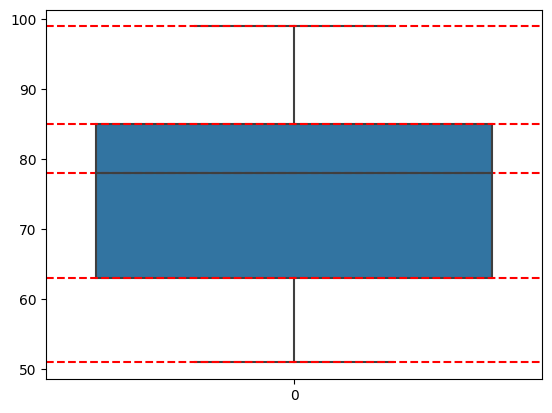

In [ ]:
sns.boxplot(quiz_1_data)

for key, value in quiz_1_answers.items():
    plt.axhline(value, linestyle='--', color='red')

plt.show()

---

### 2.

어떤 IT 기업에서 신입 공채를 진행하고 있다. 공채 전형 중 코딩테스트는 다음의 규칙에 의해 진행되었다.

- 응시자 수는 50명이다.
- '언어'는 Python, Java, C 의 3가지 중 하나이다.
- '점수'는 0 이상 100 이하의 정수이다.

이 코딩테스트의 결과는 다음과 같다.

In [ ]:
quiz_2_data

,언어,점수
0,Python,97
1,Python,28
2,C,33
3,C,75
4,Python,59
5,Java,5
6,Python,19
7,Java,20
8,Java,70
9,Java,59


#### (1)
'언어' 컬럼의 도수와 상대도수를 계산하시오.

In [ ]:
quiz_2_1_answers = {
    '도수': quiz_2_data['언어'].value_counts(),
    '상대도수':quiz_2_data['언어'].value_counts(normalize=True)
}

pd.DataFrame(quiz_2_1_answers)

,도수,상대도수
Python,25,0.5
Java,15,0.3
C,10,0.2


#### (2)
이 회사는 파이썬 사용자를 우대하기 때문에, '언어'에 따른 가중치를 다음과 같이 두고 있다.

```python
weight = {
    'Python': 1.2,
    'Java': 0.9,
    'C': 0.5
}
```

전체 응시자의 점수에 대한 평균과 가중평균을 각각 구하시오.

In [ ]:
weight = {
    'Python': 1.2,
     'Java': 0.9,
     'C': 0.5
} #언어별 가중치

quiz_2_2_answers = {
    '평균': quiz_2_data['점수'].mean(),
    '가중평균': (np.average(quiz_2_data.loc[quiz_2_data['언어']=='Python','점수'])*1.2 + np.average(quiz_2_data.loc[quiz_2_data['언어']=='Java','점수'])*0.9 + np.average(quiz_2_data.loc[quiz_2_data['언어']=='C','점수'])*0.5)/3
}

for key, value in quiz_2_2_answers.items():
    print(f"{key}: {round(value, 2)}")

평균: 49.62
가중평균: 42.32


---

### 3.

K대학교에서는 다음과 같은 기준으로 상대평가하여 학점을 매긴다.

|등급|비율|
|:---:|:---:|
|A|35%|
|B|35%|
|F|30%|

어떤 전공 강의를 듣는 학생들 45명의 점수가 다음과 같이 산출되었다.

In [ ]:
quiz_3_data

array([99.69, 95.68, 86.94, 63.31, 88.61, 50.7 , 93.58, 95.07, 97.54,
       69.04, 90.89, 96.9 , 70.8 , 86.13, 84.76, 75.18, 67.87, 79.74,
       81.36, 72.94, 92.57, 68.  , 67.9 , 72.  , 54.82, 75.7 , 94.95,
       94.98, 84.21, 65.16, 62.3 , 73.54, 80.45, 96.99, 56.99, 82.31,
       70.75, 80.8 , 62.16, 68.12, 58.87, 67.87, 69.52, 86.73, 58.4 ])

#### (1)
각 등급에서 가장 낮은 점수를 가진 학생을 '수문장'이라고 부른다고 하자. A등급과 B등급의 '수문장'의 점수를 구하시오.

In [ ]:
quiz_3_1_answers = {
    'A등급 수문장': np.quantile(quiz_3_data,0.65),#84.76,
    'B등급 수문장': np.quantile(quiz_3_data,0.30)#69.04
}

for key, value in quiz_3_1_answers.items():
    print(f"{key}: {value}점")

A등급 수문장: 84.54점
B등급 수문장: 68.304점


#### (2)
응급한 전염병의 사유로 정상적인 수업 진행이 어려워지면서, K대학교에서는 상대평가를 대신해 절대평가 성적 산출을 시행하기로 하였다.

|등급|점수|
|:---:|:---:|
|A|90점 이상|
|B|80점 이상 90점 미만|
|C|70점 이상 80점 미만|
|D|60점 이상 70점 미만|
|F|60점 미만|

절대평가를 시행할 때 각 등급에 대한 도수분포표와 히스토그램을 그리시오.

In [ ]:
# 도수분포표
bins_range = [0] + [i for i in range(60, 101, 10)] #등급 기준



pd.DataFrame({
    '계급': ['A','B','C','D','F'],
    '도수': [60,70,80,90,100]
}).set_index('계급')

,도수
계급,
A,60
B,70
C,80
D,90
F,100


In [ ]:
bins_range = [0] + [i for i in range(60, 101, 10)] #등급 기준
bins_range

[0, 60, 70, 80, 90, 100]

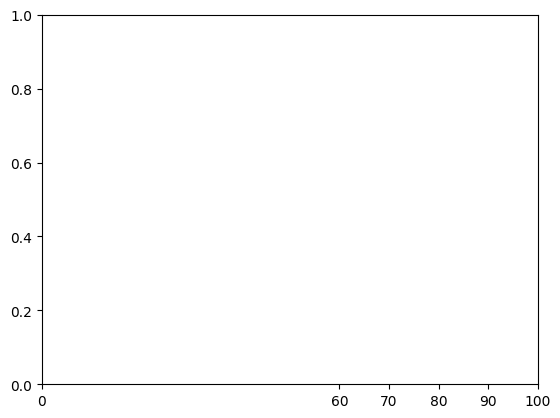

In [ ]:
# 히스토그램



plt.xticks(bins_range)
plt.show()

#### (3)
K대학교에서는 평점을 매길 때 다음과 같은 가중치를 적용한다.

|등급|가중치|
|:---:|:---:|
|A|4.5|
|B|3.5|
|C|2.5|
|D|1.5|
|F|0|

(1)에서의 상대평가안과 (2)에서의 절대평가안에 대하여, 전체 학생들의 평점의 평균을 각각 계산하시오.

In [ ]:



quiz_3_3_answers = {
    '상대평가': ,
    '절대평가':
}

for key, value in quiz_3_3_answers.items():
    print(f"{key}: {round(value, 2)}")